# 1.0 Flower Classification

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import pathlib

import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential

## 1.1 Download data

In [ ]:
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"


In [ ]:
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


## 1.2 Explore the dataset
**Directories Structure**
```
flower_photo/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/
```

In [ ]:
daisy = list(data_dir.glob('daisy/*'))
dandelion = list(data_dir.glob('dandelion/*'))
roses = list(data_dir.glob('roses/*'))
sunflowers = list(data_dir.glob('sunflowers/*'))
tulips = list(data_dir.glob('tulips/*'))

In [ ]:
print("Total: ", image_count)
print("---------------")
print("Daisy:", len(daisy))
print("Dandelion:", len(dandelion))
print("Roses:", len(roses))
print("Sunflowers:", len(sunflowers))
print("Tulips:", len(tulips))

Total:  3670
---------------
Daisy: 633
Dandelion: 898
Roses: 641
Sunflowers: 699
Tulips: 799


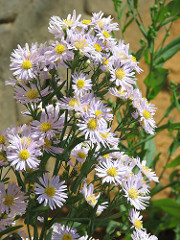

In [ ]:
PIL.Image.open(str(daisy[0]))

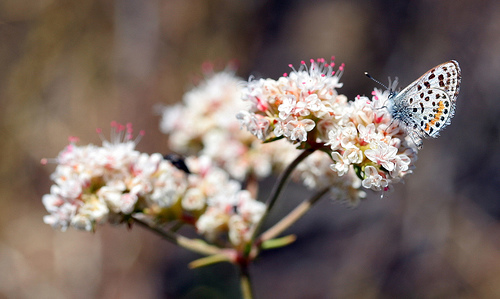

In [ ]:
PIL.Image.open(str(dandelion[0]))

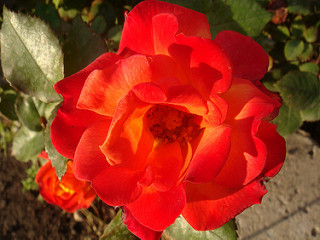

In [ ]:
PIL.Image.open(str(roses[0]))

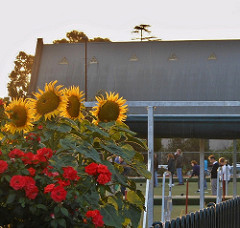

In [ ]:
PIL.Image.open(str(sunflowers[0]))

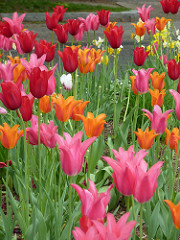

In [ ]:
PIL.Image.open(str(tulips[0]))

### 1.2.1 Define dataset from directory

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(180, 180),
    batch_size=32)

train_ds

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(180, 180),
    batch_size=32)

val_ds

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### 1.2.2 Visualize images

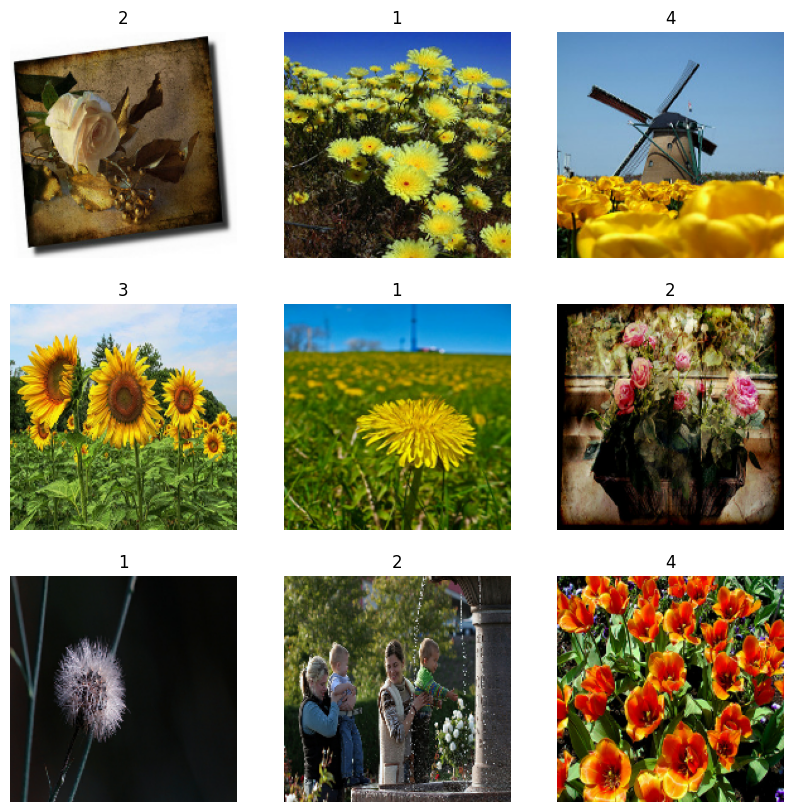

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


### 1.2.3 Data Caching

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### 1.2.4 Standardize the data

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
type(normalization_layer)

keras.src.layers.preprocessing.rescaling.Rescaling

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
normalized_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
image_batch[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[0.38961512, 0.3781772 , 0.47759622],
        [0.4090414 , 0.3959695 , 0.45076254],
        [0.39517072, 0.39851126, 0.46746555],
        ...,
        [0.02745098, 0.03137255, 0.01176471],
        [0.02745098, 0.03137255, 0.01176471],
        [0.0278504 , 0.03177197, 0.01216413]],

       [[0.38801745, 0.38856208, 0.45751637],
        [0.40228757, 0.39607847, 0.4395425 ],
        [0.3867103 , 0.39237475, 0.454902  ],
        ...,
        [0.02941177, 0.03333334, 0.01372549],
        [0.02777776, 0.03169933, 0.01209148],
        [0.02864925, 0.03257081, 0.01296297]],

       [[0.38841686, 0.39894703, 0.4354394 ],
        [0.40206975, 0.3989107 , 0.42995647],
        [0.37552655, 0.38932464, 0.43671024],
        ...,
        [0.03119094, 0.03511251, 0.01550467],
        [0.02755991, 0.03148147, 0.01187363],
        [0.02745098, 0.03137255, 0.01176471]],

       ...,

       [[0.14244749, 0.11699359, 0.06986205],
        [0.12

## 1.3.0 Build the model

### 1.3.1 Create the model

### 1.3.2 Compile the model

### 1.3.3 Model summary

### 1.3.4 Train the model

## 1.4 Visualize the training results